Enable auto-reloading of external modules

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import dependencies

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sys import getsizeof

from utils.data_loader import *
from utils.null_handler import *
from utils.EDA_utils import *

import warnings
warnings.filterwarnings('ignore')

SEED=10
matplotlib.rcParams['figure.dpi'] = 100
sns.set(rc={'figure.figsize':(8, 8)})

In [38]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment
    # clear_output()

### Loading ACSEmployment data

In [39]:
config = {
    'state': ["CA"],
    'year': '2016',
    'task': ACSEmployment
}

In [40]:
X_data_load, y_data = ACSDataLoader(task=config['task'], state=config['state'], year=config['year'])

In [41]:
# If the task is ACSEmployment, we can optimize the file size
print(f'Original: {int(getsizeof(X_data_load) / 1024**2)} mb')
print(f'Optimized: {int(getsizeof(optimize_ACSEmployment(X_data_load)) / 1024**2)} mb')

X_data = optimize_ACSEmployment(X_data_load)

Original: 45 mb
Optimized: 23 mb


#### Checking if there are nulls in the dataset

In [42]:
X_data.isnull().sum()

AGEP             0
SCHL         11466
MAR              0
RELP             0
DIS              0
ESP         300716
CIT              0
MIG           3702
MIL          74731
ANC              0
NATIVITY         0
DEAR             0
DEYE             0
DREM         19605
SEX              0
RAC1P            0
dtype: int64

### Preprocessing: Handling nulls

In [43]:
missing = ['SCHL', 'ESP', 'MIG', 'MIL', 'DREM']

In [44]:
handle_nulls = {
    'special': ['SCHL','MIG', 'MIL', 'DREM', 'ESP'],
}

In [45]:
# Checking dataset shape before handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

In [46]:
for how_to in handle_nulls.keys():
    X_data = handle_df_nulls(X_data, how_to, handle_nulls[how_to])

vals --  {'SCHL': 0, 'MIG': 0, 'MIL': 0, 'DREM': 0, 'ESP': 0}


In [47]:
#Checking dataset shape after handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

#### Rechecking if there are nulls -- if the null_handler has run correctly, there should not be

In [48]:
X_data.isnull().sum()

AGEP        0
SCHL        0
MAR         0
RELP        0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
RAC1P       0
dtype: int64

### Analysis for Different Null Scenarios

#### "Optional" Type of Nulls [MAR column]

**Scenario:** MAR, when MAR is in (2,3,4)

In [49]:
special_values = [2, 3, 4]
condition_col='MAR'
target_col='MAR'
fraction=0.9
corrupted_data_MAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MAR column: 47040
Count of all records in MAR column: 376035
Count of records in MAR column in the defined condition: 52267




<Figure size 800x800 with 0 Axes>

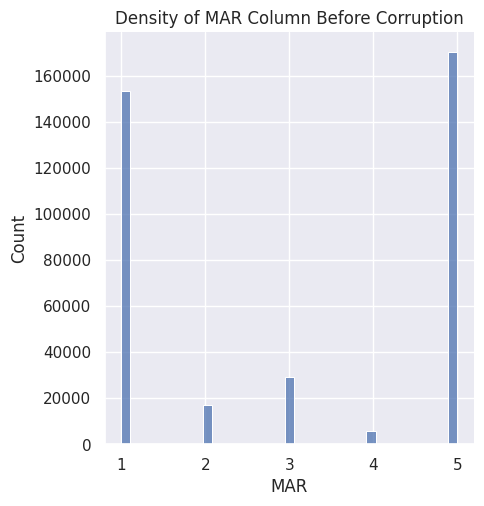

<Figure size 800x800 with 0 Axes>

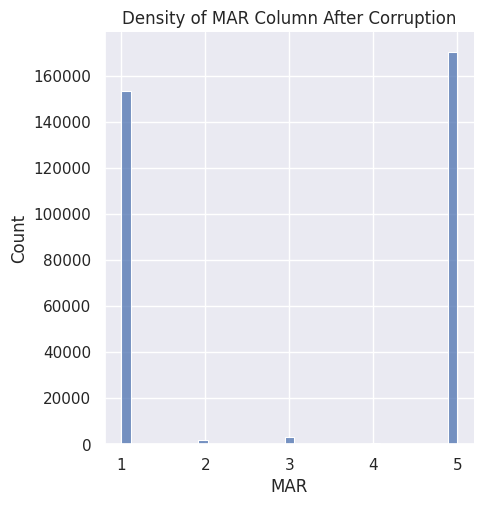

Plot AGEP column Split by Race [Before Corruption]


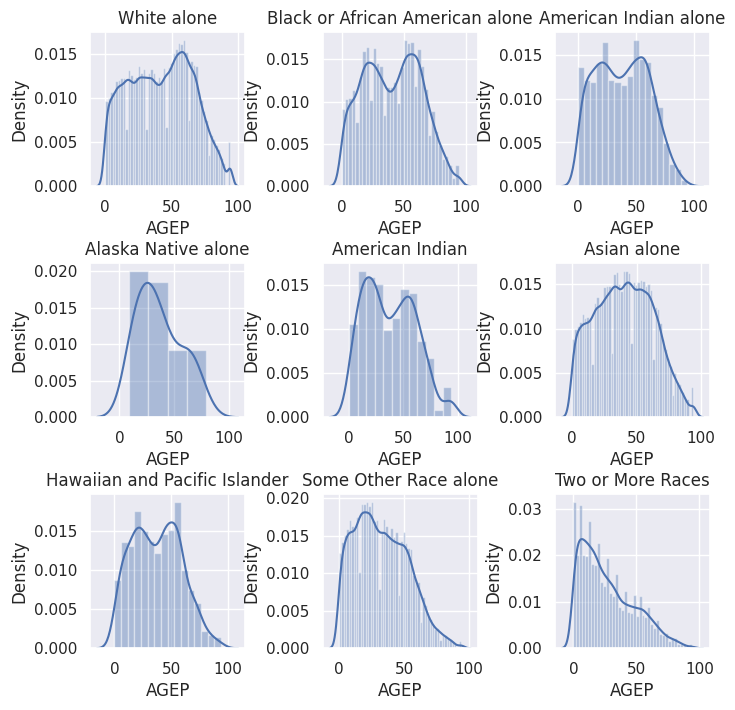




Plot AGEP column Split by Race [After Corruption]


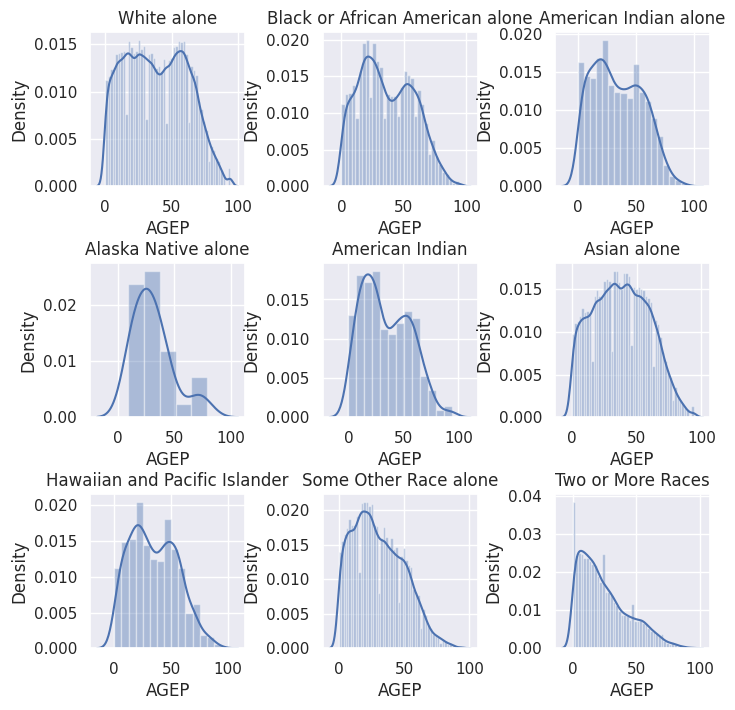

In [50]:
null_scenario_analysis(X_data, corrupted_data_MAR, target_col, condition_col, special_values)

### "Not Applicable" Type of Nulls

#### MIL Column

In [51]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='MIL'
fraction=0.9
corrupted_data_MIL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIL column: 67257
Count of all records in MIL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 800x800 with 0 Axes>

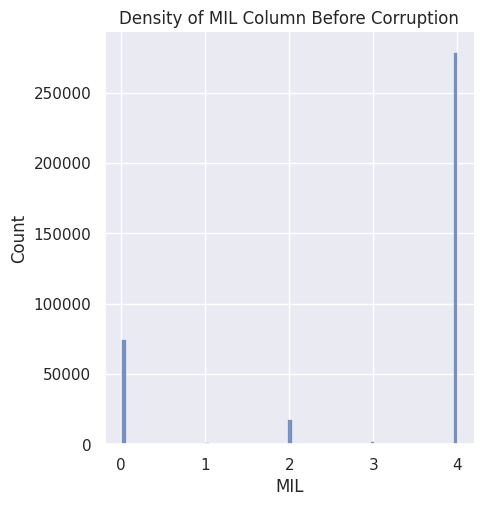

<Figure size 800x800 with 0 Axes>

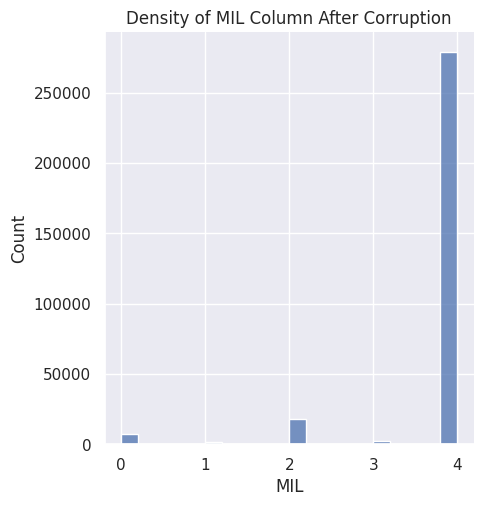

Plot AGEP column Split by Race [Before Corruption]


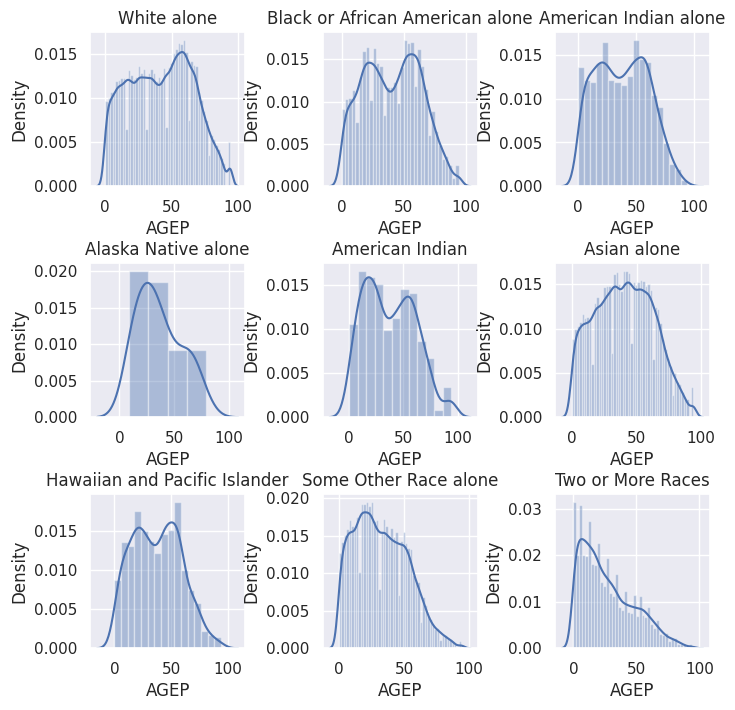




Plot AGEP column Split by Race [After Corruption]


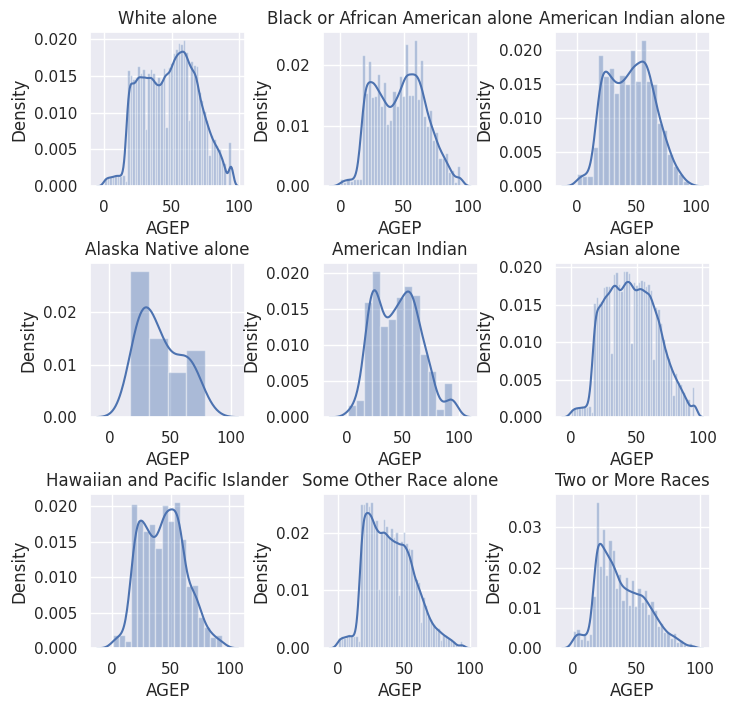

In [52]:
null_scenario_analysis(X_data, corrupted_data_MIL, target_col, condition_col, special_values)

#### SCHL Column

**Scenario:** SCHL is null, when AGEP less than 3 years old

In [53]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='SCHL'
fraction=0.9
corrupted_data_MIL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for SCHL column: 67257
Count of all records in SCHL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 800x800 with 0 Axes>

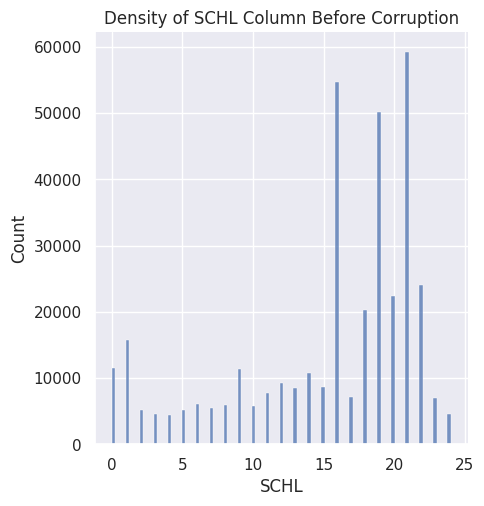

<Figure size 800x800 with 0 Axes>

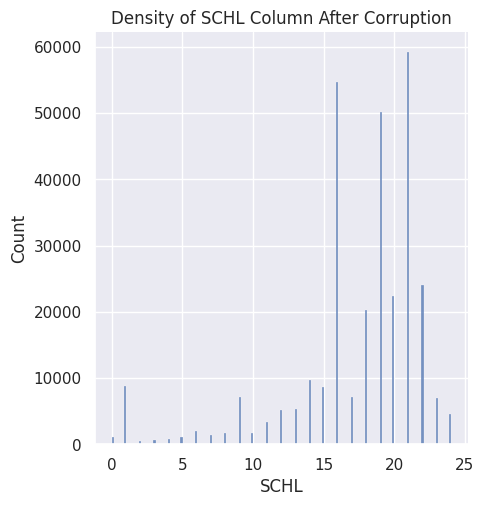

Plot AGEP column Split by Race [Before Corruption]


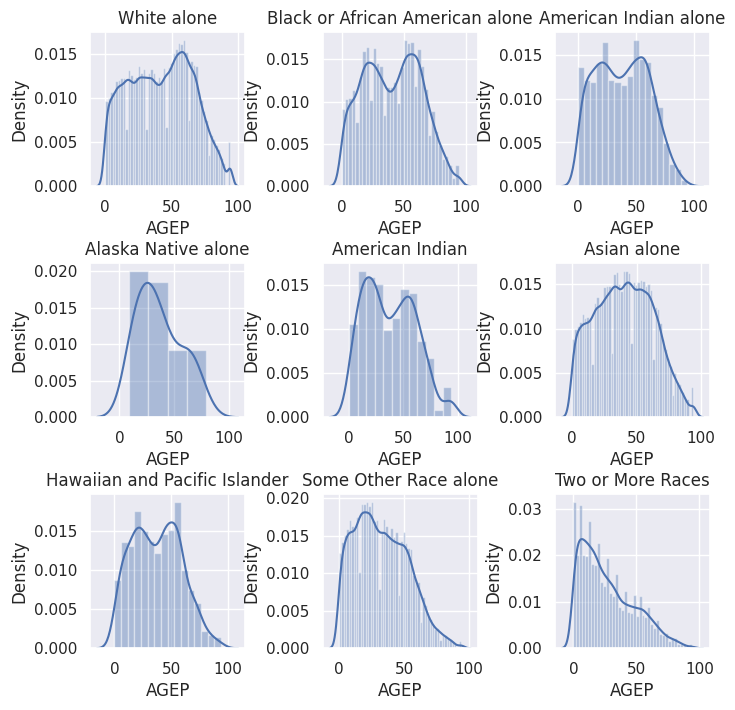




Plot AGEP column Split by Race [After Corruption]


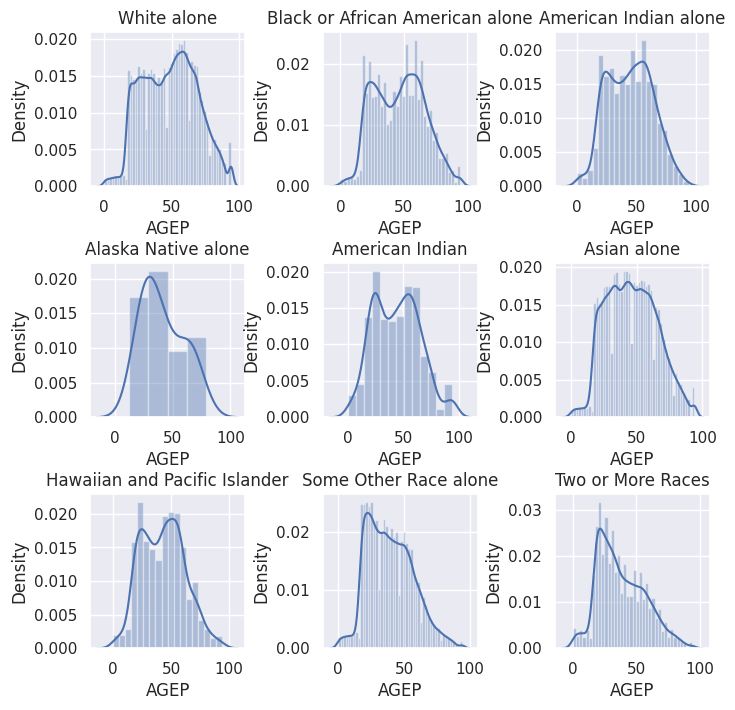

In [54]:
null_scenario_analysis(X_data, corrupted_data_MIL, target_col, condition_col, special_values)

#### ESP Column

**Scenario:** ESP is null, when you do not own child of householder, and not child in subfamily

In [55]:
special_values = [0]
condition_col='ESP'
target_col='ESP'
fraction=0.9
corrupted_data_ESP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for ESP column: 270644
Count of all records in ESP column: 376035
Count of records in ESP column in the defined condition: 300716




<Figure size 800x800 with 0 Axes>

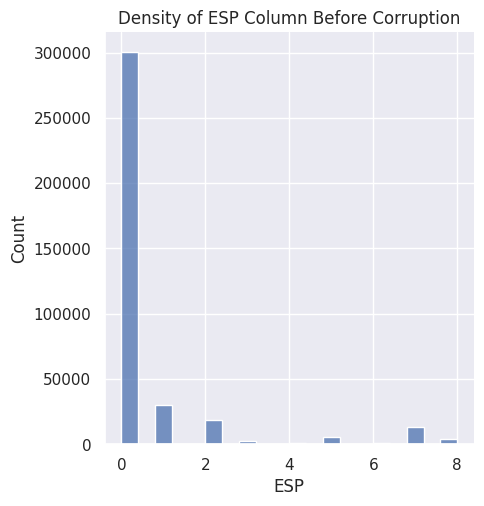

<Figure size 800x800 with 0 Axes>

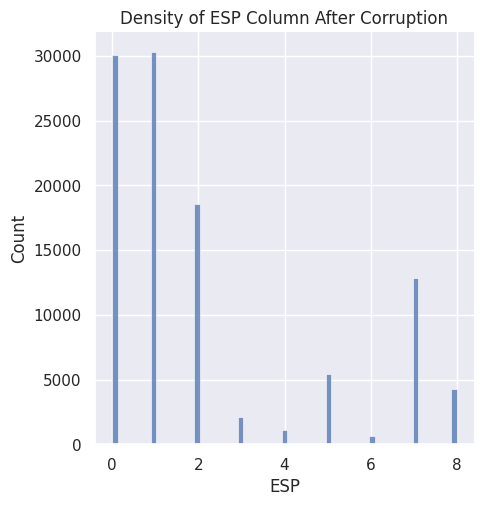

Plot AGEP column Split by Race [Before Corruption]


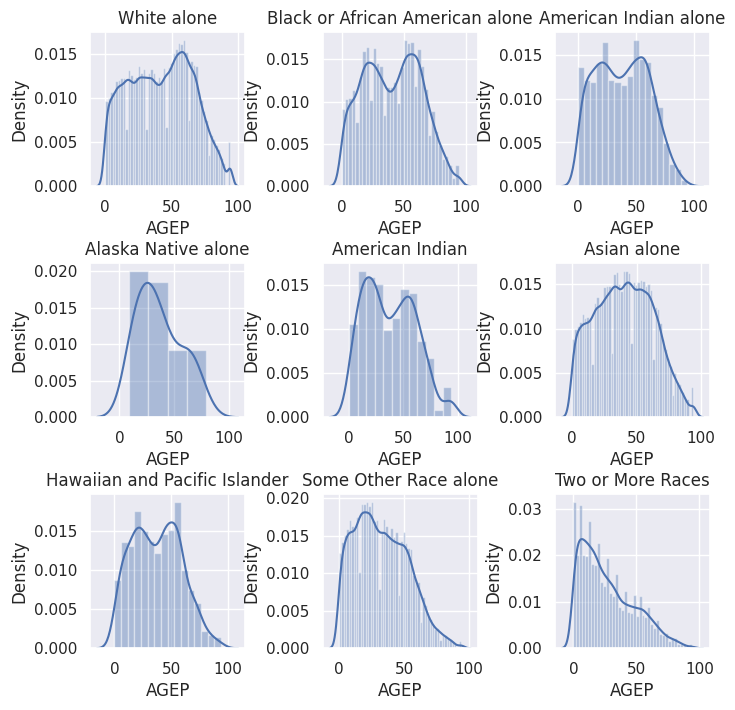




Plot AGEP column Split by Race [After Corruption]


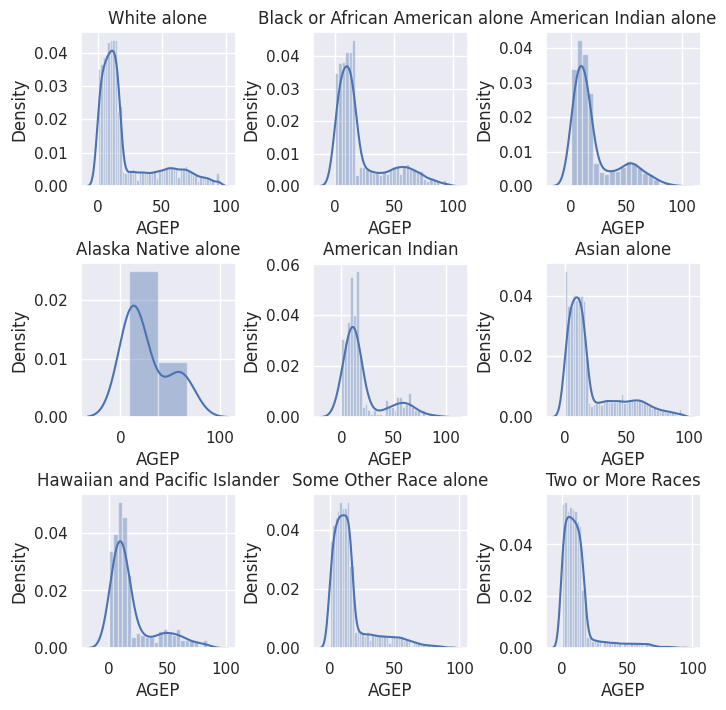

In [56]:
null_scenario_analysis(X_data, corrupted_data_ESP, target_col, condition_col, special_values)

#### MIG Column

**Scenario:** MIG, when AGEP is less than 1 year old

In [57]:
special_values = [0, 1]
condition_col='AGEP'
target_col='MIG'
fraction=0.9
corrupted_data_MIG = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIG column: 6776
Count of all records in MIG column: 376035
Count of records in AGEP column in the defined condition: 7529




<Figure size 800x800 with 0 Axes>

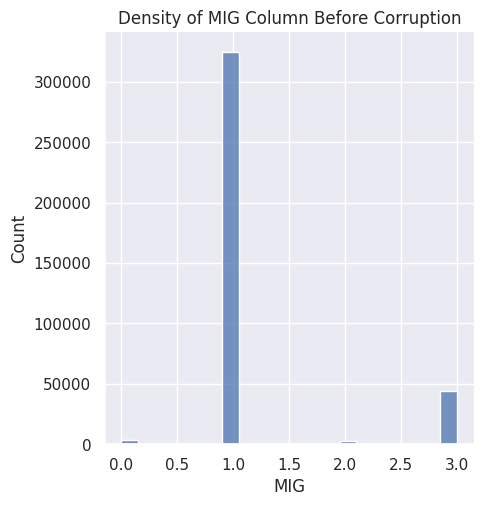

<Figure size 800x800 with 0 Axes>

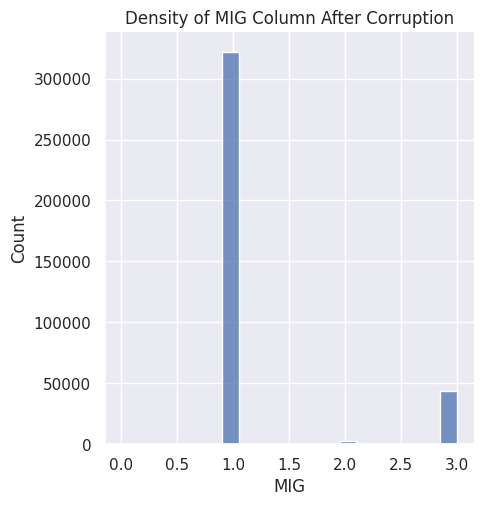

Plot AGEP column Split by Race [Before Corruption]


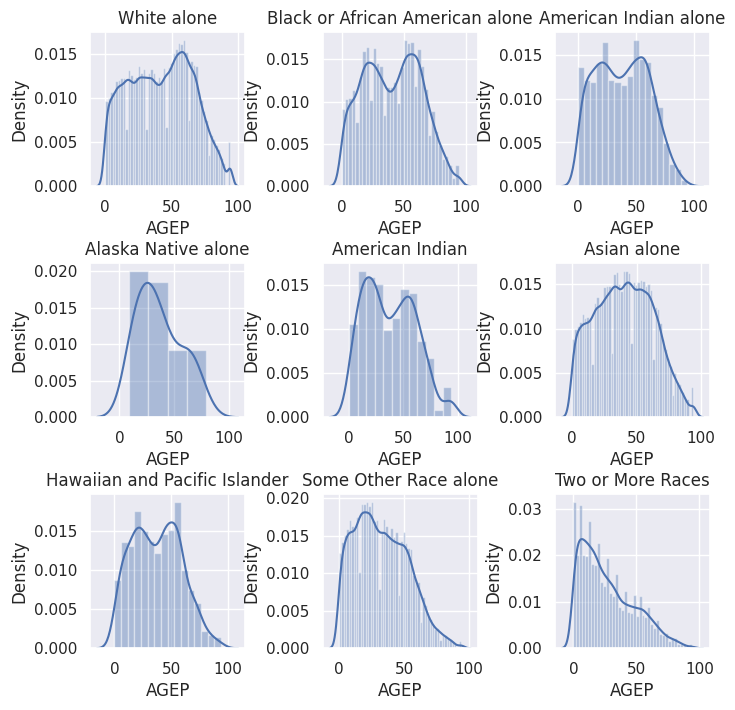




Plot AGEP column Split by Race [After Corruption]


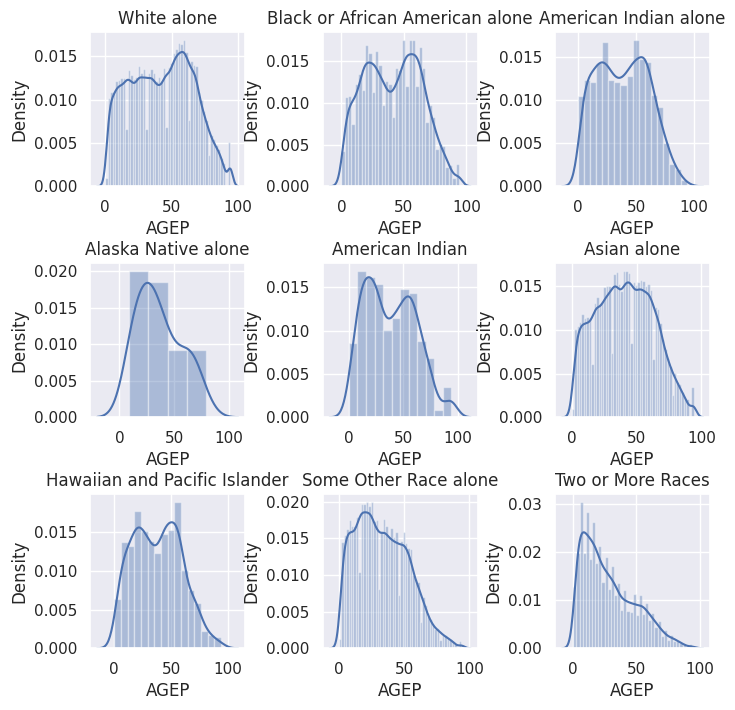

In [58]:
null_scenario_analysis(X_data, corrupted_data_MIG, target_col, condition_col, special_values)

#### DREM Column

**Scenario:** DREM is null, when AGEP is less than 5 years old

In [59]:
special_values = [i for i in range(0, 5)]
condition_col='AGEP'
target_col='DREM'
fraction=0.9
corrupted_data_DREM = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DREM column: 17644
Count of all records in DREM column: 376035
Count of records in AGEP column in the defined condition: 19605




<Figure size 800x800 with 0 Axes>

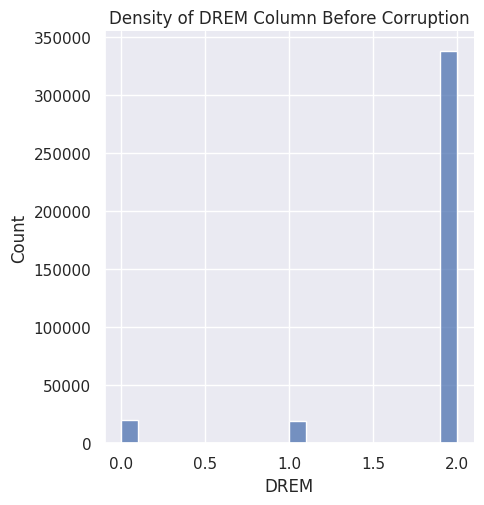

<Figure size 800x800 with 0 Axes>

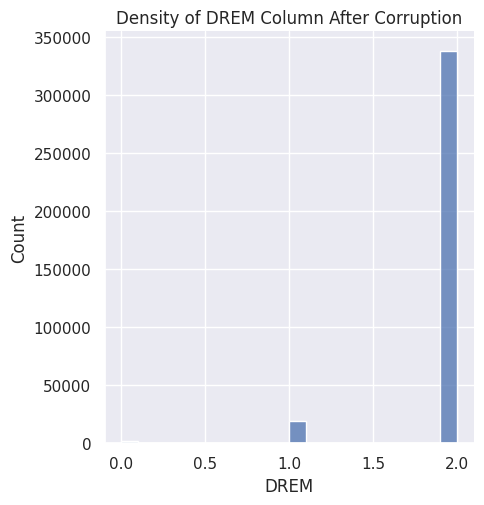

Plot AGEP column Split by Race [Before Corruption]


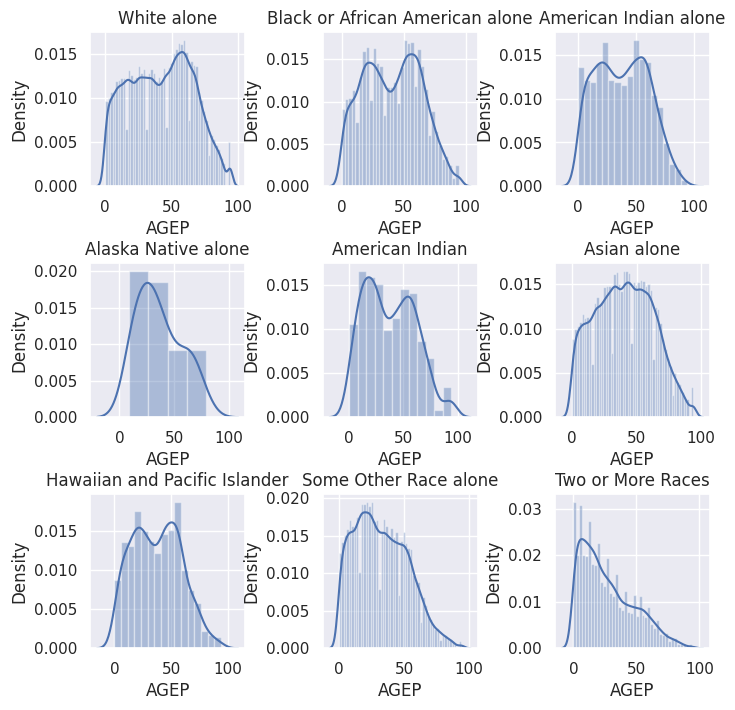




Plot AGEP column Split by Race [After Corruption]


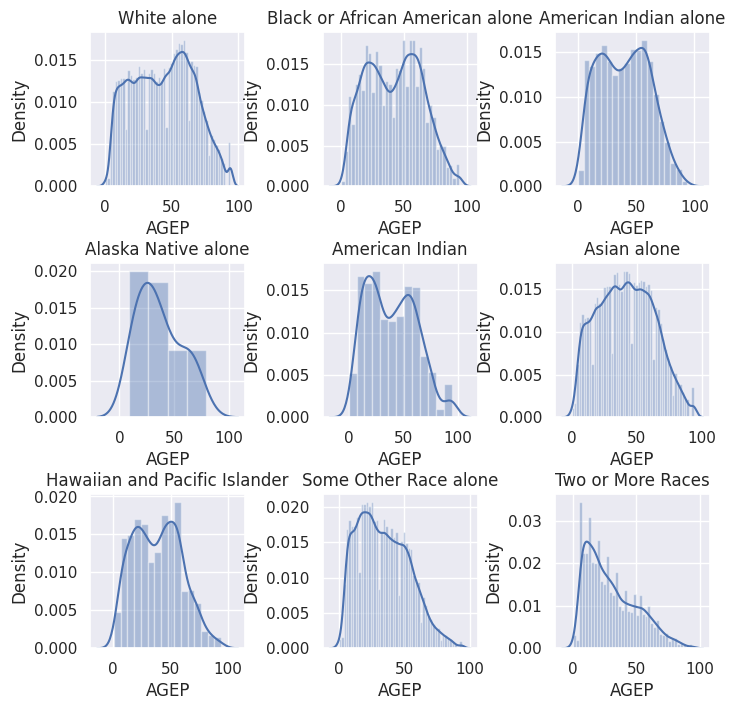

In [60]:
null_scenario_analysis(X_data, corrupted_data_DREM, target_col, condition_col, special_values)

## Unknown

### AGEP, when RELP is in (8,10,11,12,15)

In [70]:
special_values = (8, 10, 11, 12, 15)
condition_col = 'RELP'
target_col = 'AGEP'
fraction = .9
corrupted_data_AGEP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for AGEP column: 20599
Count of all records in AGEP column: 376035
Count of records in RELP column in the defined condition: 22888




<Figure size 1200x1200 with 0 Axes>

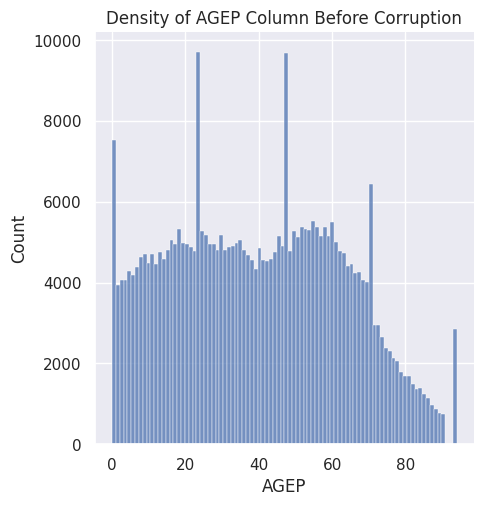

<Figure size 1200x1200 with 0 Axes>

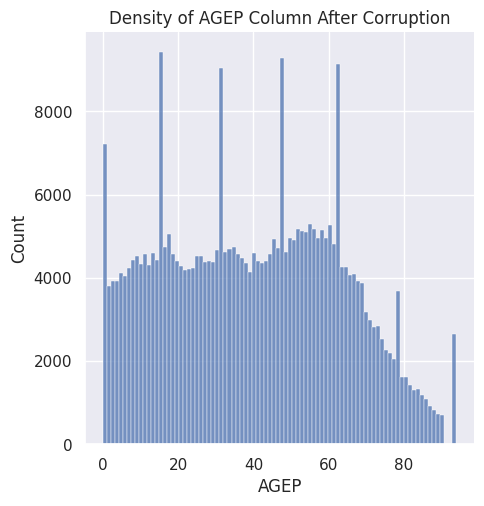

Plot AGEP column Split by Race [Before Corruption]


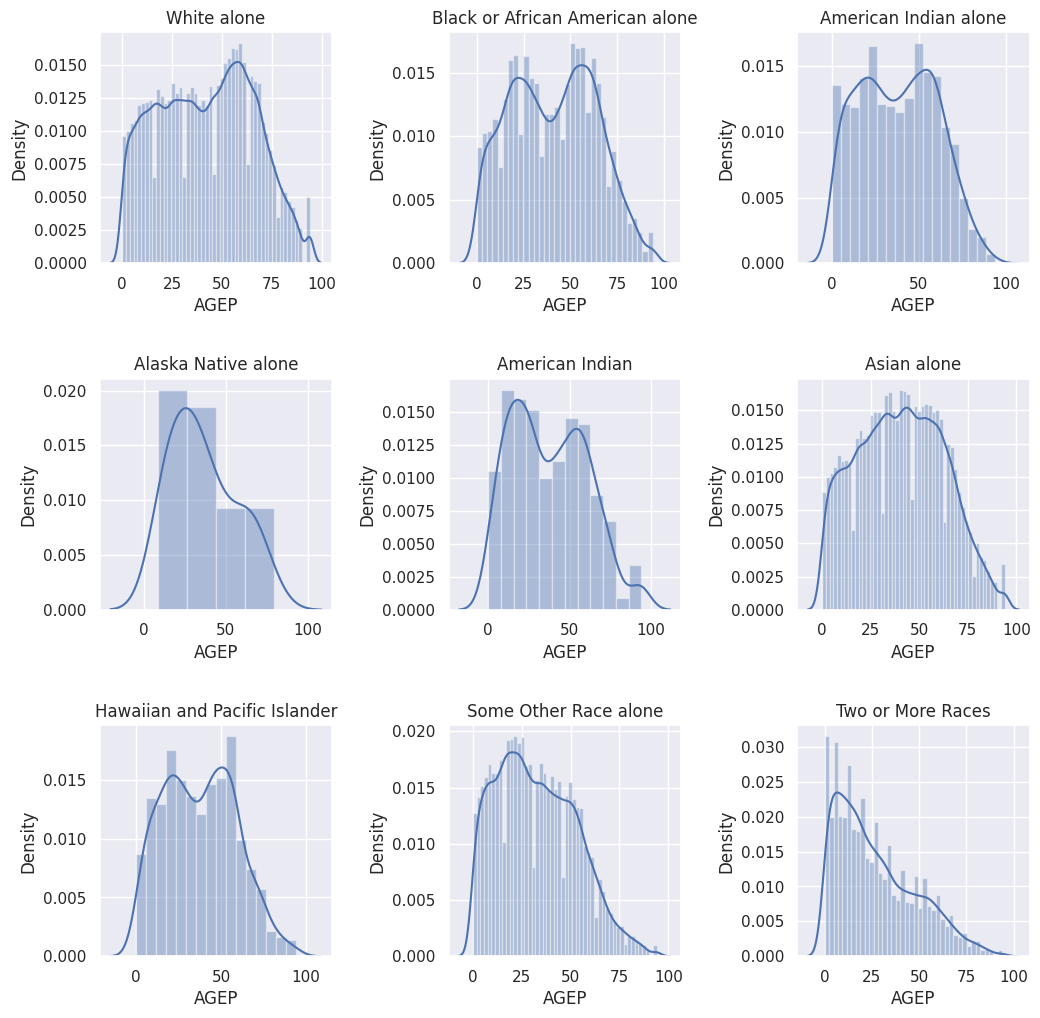




Plot AGEP column Split by Race [After Corruption]


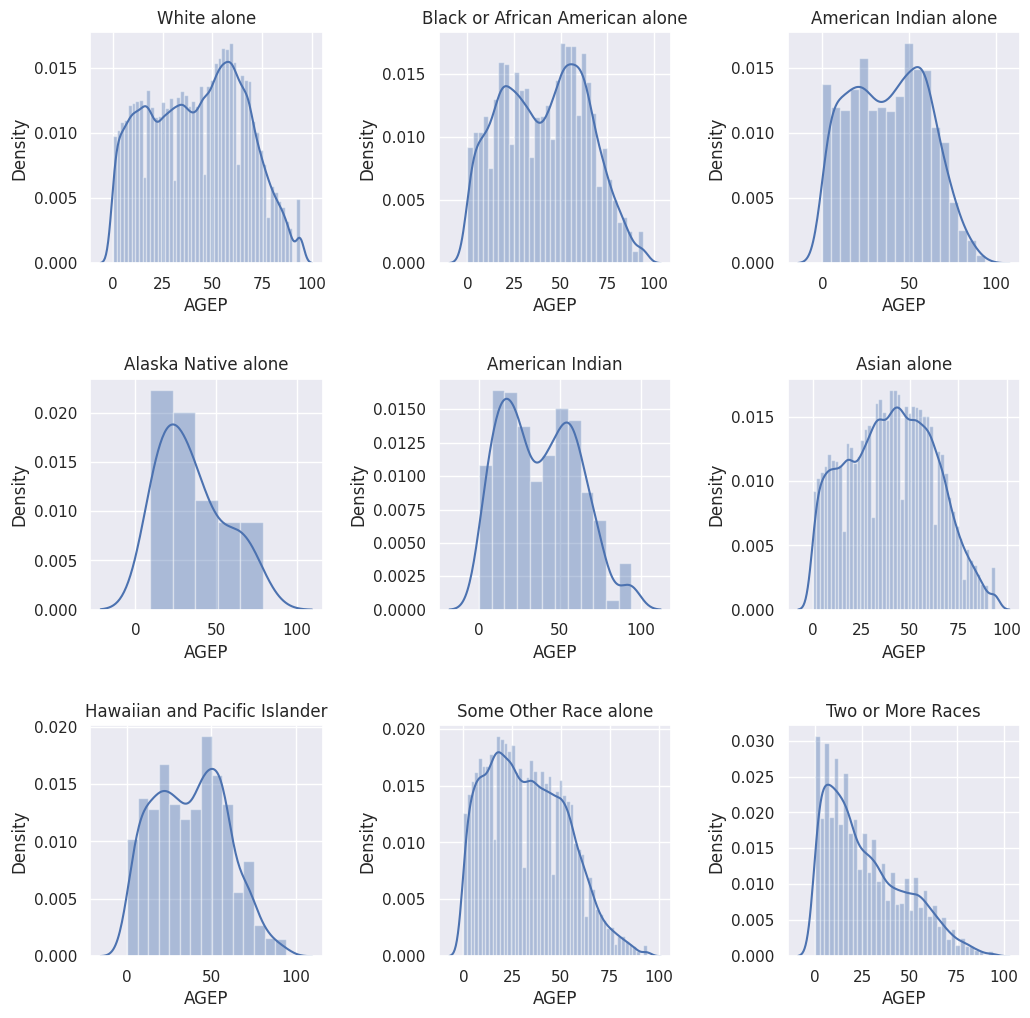

In [103]:
null_scenario_analysis(X_data, corrupted_data_AGEP, target_col, condition_col, special_values)

### NATIVITY. When RELP is in (11,12,15)

In [ ]:
special_values = (11, 12, 15)
condition_col = 'RELP'
target_col = 'NATIVITY'
fraction = .9
corrupted_data_NATIVITY = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

## Avoided

In [108]:
condition_cols = ['DIS']
target_cols = ['DIS']
special_values = [True]
fraction = .9
corrupted_data_DIS = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

In [109]:
condition_cols = ['DEAR']
target_cols = ['DEAR']
special_values = [True]
fraction = .9
corrupted_data_DEAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

In [110]:
condition_cols = ['DEYE']
target_cols = ['DEYE']
special_values = [True]
fraction = .9
corrupted_data_DEYE = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

In [111]:
condition_cols = ['DREM']
target_cols = ['DREM']
special_values = [True]
fraction = .9
corrupted_data_DREM = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

## Special

SEX, when sex is male or ratio of male and female can be 60:40, assuming person is non-binary, impute as NULL (special)

In [112]:
special_values = [1]
condition_col = 'SEX'
target_col = 'SEX'
fraction = .11
corrupted_data_SEX = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

RAC1P, when RAC1P is 9, assuming people are biracial, impute as NULL (special)

In [113]:
special_values = [9]
condition_col = 'RAC1P'
target_col = 'RAC1P'
fraction = .9
corrupted_data_RAC1P = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

## Impute Nulls

In [96]:
def impute_with_all_techniques(corrupted_data, target_column, column_type):
    if column_type == "categorical":
        how_to_list = ["impute-by-mode", "impute-by-mode-trimmed"]
    elif column_type == "numerical":
        how_to_list = ["impute-by-mean", "impute-by-mean-trimmed", "impute-by-median", "impute-by-median-trimmed"]
    else:
        raise ValueError("Incorrect input column_type. It must be in ('categorical', 'numerical')")

    imputed_data_dict = dict()
    for how_to in how_to_list:
        print("\n" * 4, "#" * 15, f" Impute {target_column} column with {how_to} technique ", "#" * 15)
        imputed_data = handle_df_nulls(corrupted_data, how_to, column_names=[target_column])
        imputed_data_dict[how_to] = imputed_data
        imputed_nulls_analysis(imputed_data, corrupted_data, target_col=target_column)

    return imputed_data_dict





 ###############  Impute MAR column with impute-by-mode technique  ###############
Impute values:  {'MAR': 5.0}
Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

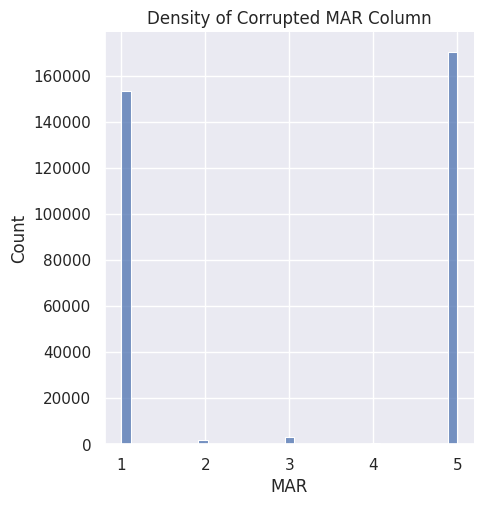

<Figure size 1200x1200 with 0 Axes>

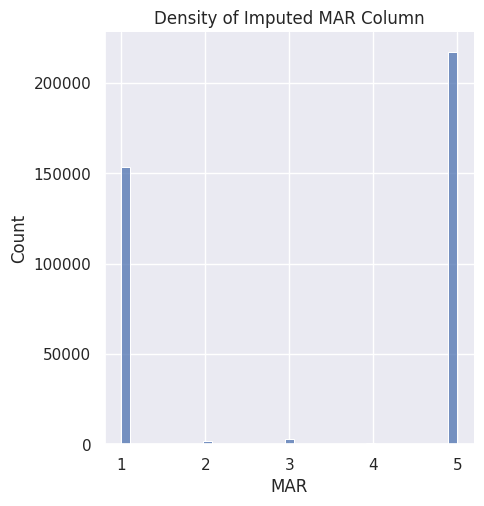





 ###############  Impute MAR column with impute-by-mode-trimmed technique  ###############
Impute values:  {'MAR': 5.0}
Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

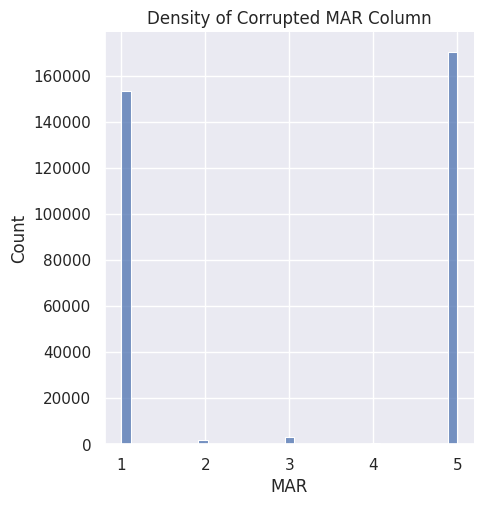

<Figure size 1200x1200 with 0 Axes>

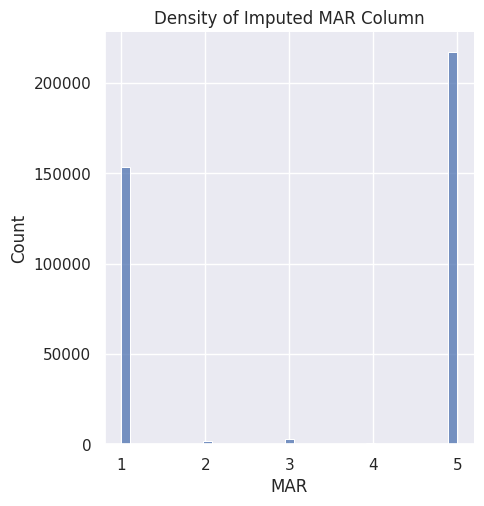

In [97]:
imputed_data_dict_MAR = impute_with_all_techniques(corrupted_data_MAR, target_column="MAR", column_type="categorical")





 ###############  Impute AGEP column with impute-by-mean technique  ###############
Impute values:  {'AGEP': 40.084372432730504}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

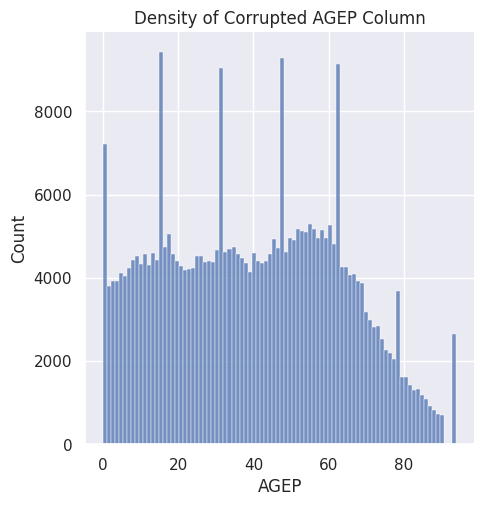

<Figure size 1200x1200 with 0 Axes>

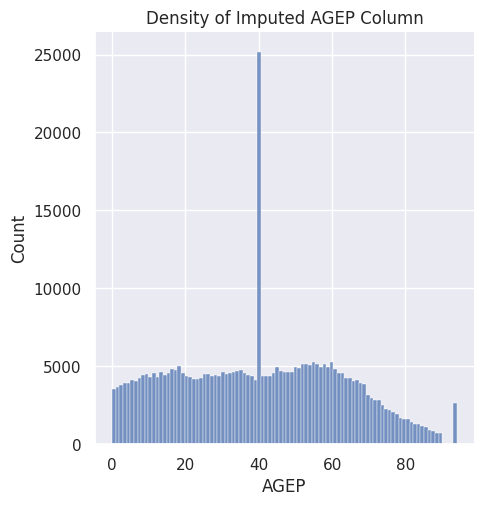





 ###############  Impute AGEP column with impute-by-mean-trimmed technique  ###############
Impute values:  {'AGEP': 39.642338667135576}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

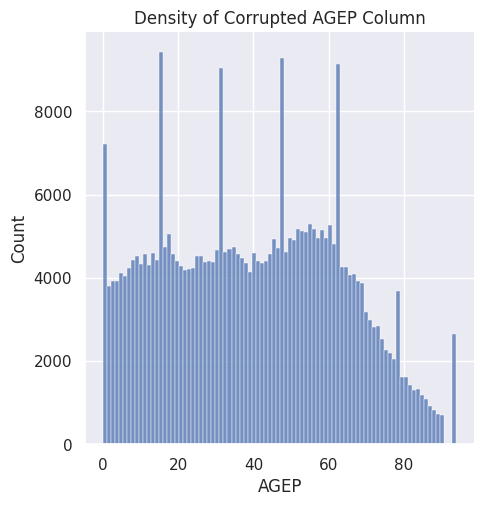

<Figure size 1200x1200 with 0 Axes>

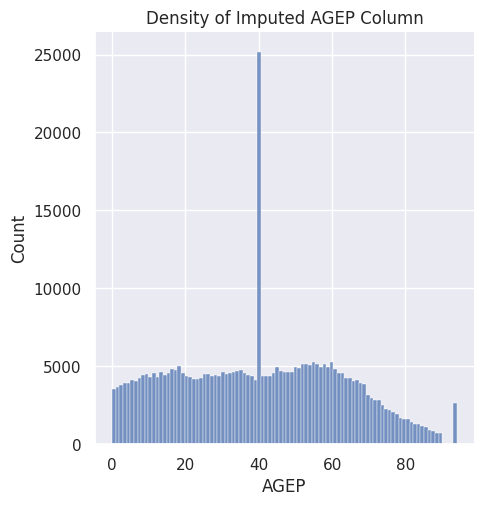





 ###############  Impute AGEP column with impute-by-median technique  ###############
Impute values:  {'AGEP': 40.0}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

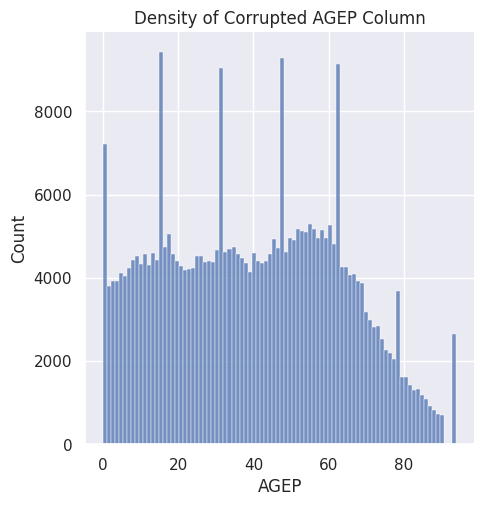

<Figure size 1200x1200 with 0 Axes>

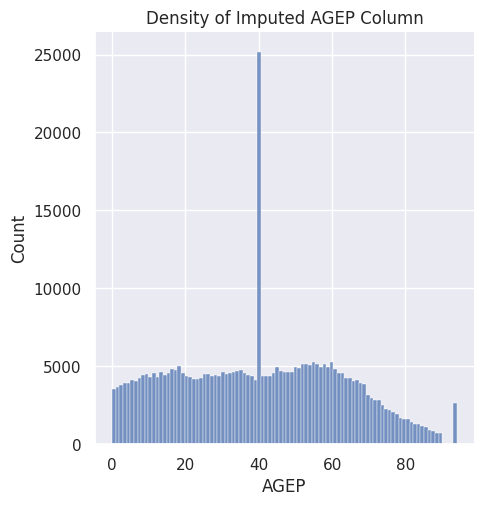





 ###############  Impute AGEP column with impute-by-median-trimmed technique  ###############
Impute values:  {'AGEP': 40.0}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

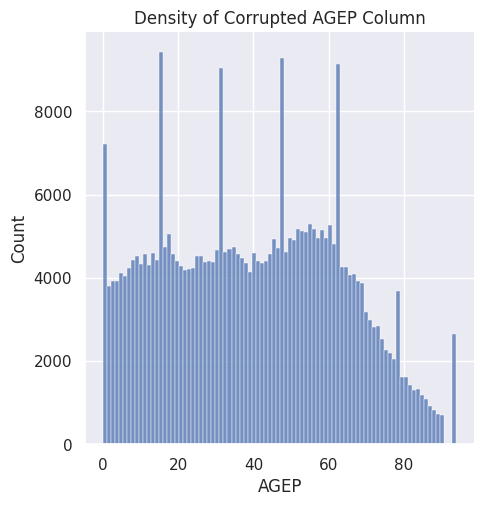

<Figure size 1200x1200 with 0 Axes>

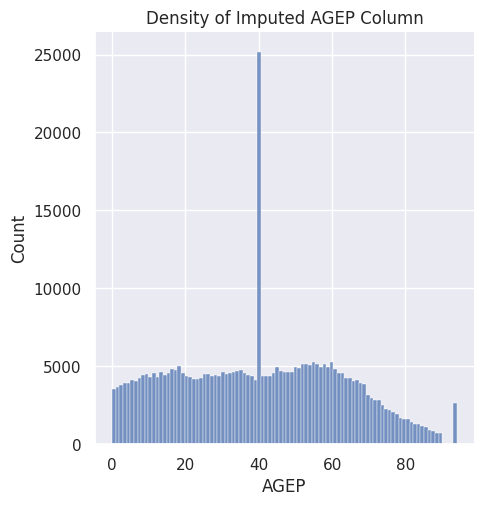

In [98]:
imputed_data_dict_AGEP = impute_with_all_techniques(corrupted_data_AGEP, target_column="AGEP", column_type="numerical")

Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

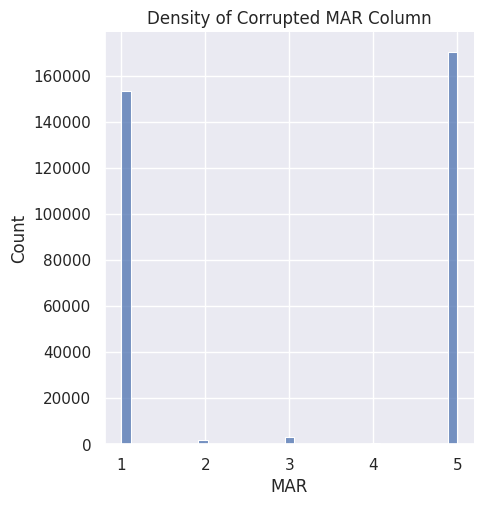

<Figure size 1200x1200 with 0 Axes>

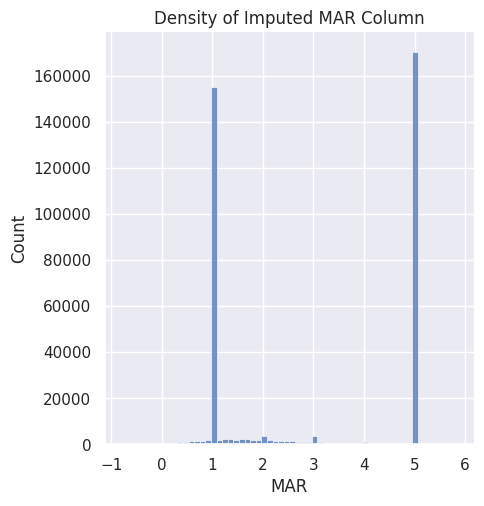

In [101]:
how_to = "predict-by-sklearn"
predicted_data_MAR = handle_df_nulls(corrupted_data_MAR, how_to, column_names=['MAR'])
imputed_nulls_analysis(predicted_data_MAR, corrupted_data_MAR, target_col="MAR")

Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

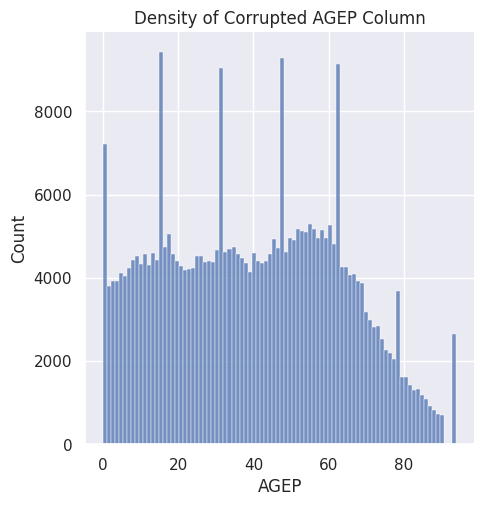

<Figure size 1200x1200 with 0 Axes>

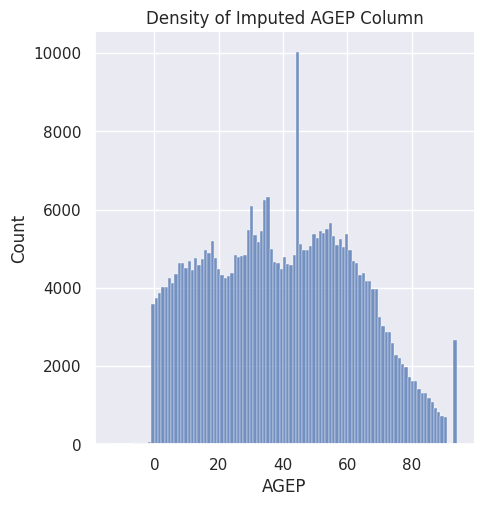

In [102]:
how_to = "predict-by-sklearn"
predicted_data_AGEP = handle_df_nulls(corrupted_data_AGEP, how_to, column_names=['AGEP'])
imputed_nulls_analysis(predicted_data_AGEP, corrupted_data_AGEP, target_col="AGEP")

Number of nulls in MIG column in the corrupted dataframe:  6776
Number of nulls in MIG column in the imputed dataframe:  0


<Figure size 1200x1200 with 0 Axes>

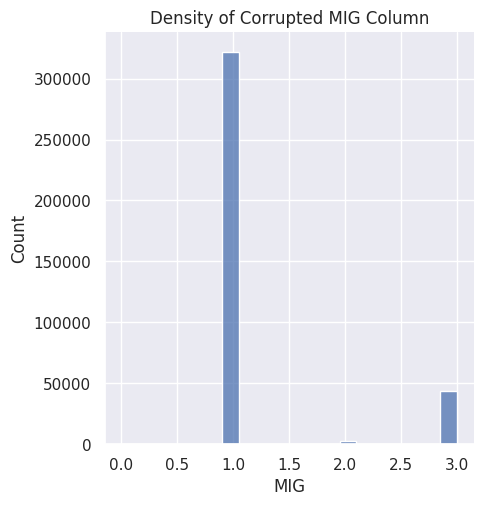

<Figure size 1200x1200 with 0 Axes>

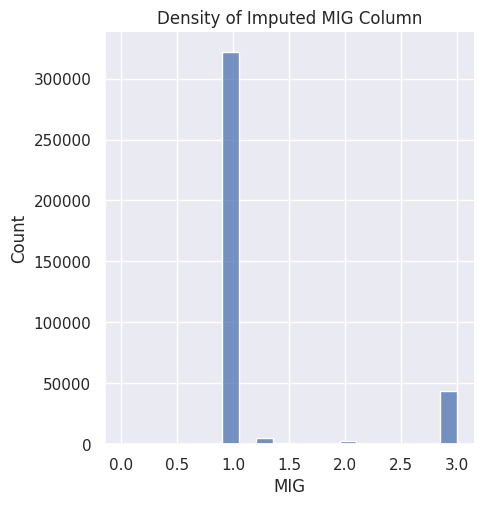

In [114]:
how_to = "predict-by-sklearn"
predicted_data_MIG = handle_df_nulls(corrupted_data_MIG, how_to, column_names=['MIG'])
imputed_nulls_analysis(predicted_data_MIG, corrupted_data_MIG, target_col="MIG")